<a href="https://colab.research.google.com/github/PaulNjinu254/TensorFlow/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Iris Accuracy: 0.8666666666666667


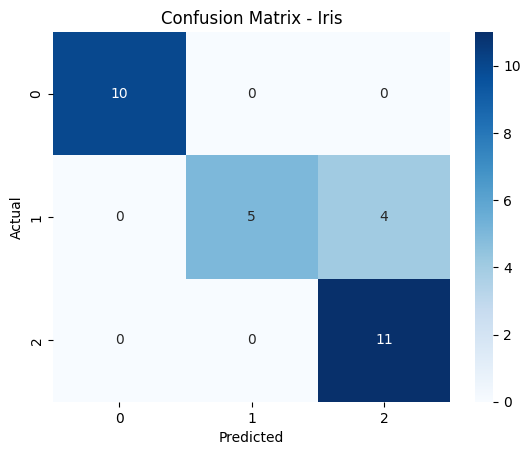


Please upload the 'train.csv' file for the House Prices dataset


Saving train.csv to train (1).csv
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

House Prices MSE: 7698151424.0


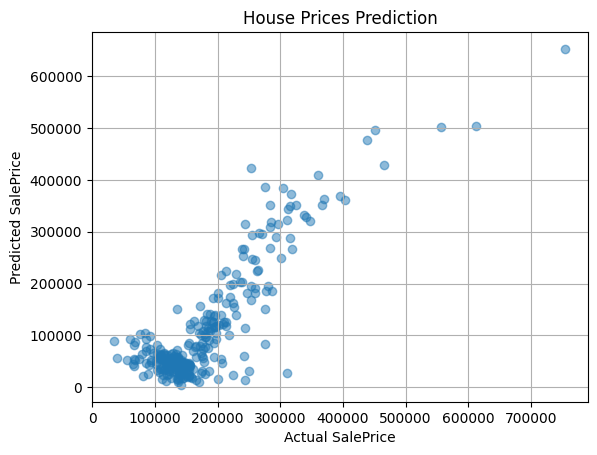

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8260 - loss: 0.6185
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9583 - loss: 0.1416
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9706 - loss: 0.0962
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9771 - loss: 0.0751
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0528
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

MNIST Accuracy: 0.9735


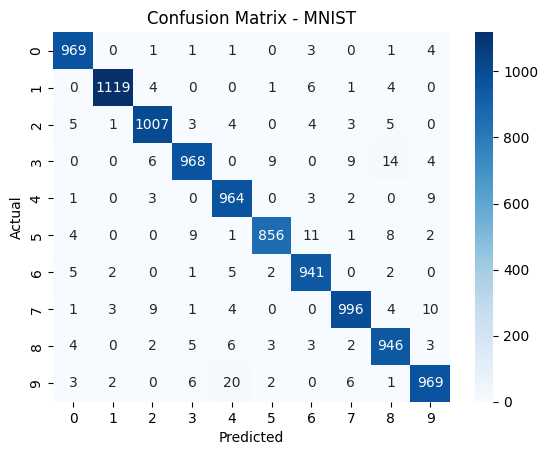

In [3]:
# Neural Network Models for Iris, House Prices, and MNIST Datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from tensorflow.keras.datasets import mnist
from google.colab import files
import io

# 1. IRIS Dataset (Multi-Class Classification)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
encoder_iris = OneHotEncoder(sparse_output=False)
y_iris_oh = encoder_iris.fit_transform(y_iris.reshape(-1, 1))

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris_oh, test_size=0.2, random_state=42)
scaler_i = StandardScaler()
X_train_i = scaler_i.fit_transform(X_train_i)
X_test_i = scaler_i.transform(X_test_i)

model_iris = Sequential([
    Input(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])
model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_iris.fit(X_train_i, y_train_i, epochs=50, verbose=0)

# Predict and evaluate Iris
pred_i = model_iris.predict(X_test_i)
y_pred_i = np.argmax(pred_i, axis=1)
y_true_i = np.argmax(y_test_i, axis=1)
print("\nIris Accuracy:", accuracy_score(y_true_i, y_pred_i))
cm_i = confusion_matrix(y_true_i, y_pred_i)
sns.heatmap(cm_i, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Iris")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. House Prices Dataset (Regression)
print("\nPlease upload the 'train.csv' file for the House Prices dataset")
uploaded = files.upload()
file_name = next(iter(uploaded))
house_data = pd.read_csv(io.BytesIO(uploaded[file_name]))

X_house = house_data.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1).fillna(0)
y_house = house_data['SalePrice']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
scaler_h = StandardScaler()
X_train_h = scaler_h.fit_transform(X_train_h)
X_test_h = scaler_h.transform(X_test_h)

model_house = Sequential([
    Input(shape=(X_train_h.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
model_house.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_house.fit(X_train_h, y_train_h, epochs=50, verbose=0)

# Predict and evaluate House Prices
y_pred_h = model_house.predict(X_test_h)
print("\nHouse Prices MSE:", mean_squared_error(y_test_h, y_pred_h))
plt.scatter(y_test_h, y_pred_h, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("House Prices Prediction")
plt.grid(True)
plt.show()

# 3. MNIST Dataset (Multi-Class Classification)
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()
X_train_m = X_train_m / 255.0
X_test_m = X_test_m / 255.0

encoder_m = OneHotEncoder(sparse_output=False)
y_train_m_oh = encoder_m.fit_transform(y_train_m.reshape(-1, 1))
y_test_m_oh = encoder_m.transform(y_test_m.reshape(-1, 1))

model_mnist = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(X_train_m, y_train_m_oh, epochs=5, batch_size=128, verbose=1)

# Predict and evaluate MNIST
pred_m = model_mnist.predict(X_test_m)
y_pred_m = np.argmax(pred_m, axis=1)
print("\nMNIST Accuracy:", accuracy_score(y_test_m, y_pred_m))
cm_m = confusion_matrix(y_test_m, y_pred_m)
sns.heatmap(cm_m, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MNIST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
